In [2]:
# loading libraries
library(caret)
library(rpart.plot)

#reading in the data
data_url <- c("https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data")
download.file(url = data_url, destfile = "car.data")
 
car_df <- read.csv("car.data", sep = ',', header = FALSE)

Warning message:
“package ‘caret’ was built under R version 3.3.2”Loading required package: lattice
Loading required package: ggplot2
Warning message:
“package ‘ggplot2’ was built under R version 3.3.2”Warning message:
“package ‘rpart.plot’ was built under R version 3.3.2”Loading required package: rpart


In [3]:
str(car_df)

'data.frame':	1728 obs. of  7 variables:
 $ V1: Factor w/ 4 levels "high","low","med",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ V2: Factor w/ 4 levels "high","low","med",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ V3: Factor w/ 4 levels "2","3","4","5more": 1 1 1 1 1 1 1 1 1 1 ...
 $ V4: Factor w/ 3 levels "2","4","more": 1 1 1 1 1 1 1 1 1 2 ...
 $ V5: Factor w/ 3 levels "big","med","small": 3 3 3 2 2 2 1 1 1 3 ...
 $ V6: Factor w/ 3 levels "high","low","med": 2 3 1 2 3 1 2 3 1 2 ...
 $ V7: Factor w/ 4 levels "acc","good","unacc",..: 3 3 3 3 3 3 3 3 3 3 ...


In [4]:
# first 5 columns of df
head(car_df)

V1,V2,V3,V4,V5,V6,V7
vhigh,vhigh,2,2,small,low,unacc
vhigh,vhigh,2,2,small,med,unacc
vhigh,vhigh,2,2,small,high,unacc
vhigh,vhigh,2,2,med,low,unacc
vhigh,vhigh,2,2,med,med,unacc
vhigh,vhigh,2,2,med,high,unacc


In [6]:
# Data slicing into training and test
set.seed(3033)
intrain <- createDataPartition(y=car_df$V7, p=0.7, list=FALSE)
training <- car_df[intrain,]
testing <- car_df[-intrain,]

In [7]:
# checking dimensions
dim(training); dim(testing)

[1] 1211    7

[1] 517   7

In [8]:
# Preprocessing and training
anyNA(car_df)

[1] FALSE

In [10]:
library(e1071)
trctrl <- trainControl(method = "repeatedcv", number = 10, repeats = 3)
set.seed(3333)
dtree_fit <- train(V7 ~., data = training, method = "rpart",
                   parms = list(split = "information"),
                   trControl=trctrl,
                   tuneLength = 10)

Warning message:
“package ‘e1071’ was built under R version 3.3.2”

In [11]:
dtree_fit

CART 

1211 samples
   6 predictor
   4 classes: 'acc', 'good', 'unacc', 'vgood' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 1091, 1090, 1091, 1089, 1089, 1089, ... 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0.01098901  0.8580406  0.6994059
  0.01373626  0.8249997  0.6220574
  0.01510989  0.8159311  0.6034018
  0.01556777  0.8084860  0.5840711
  0.01648352  0.8065620  0.5775304
  0.01831502  0.7979943  0.5577698
  0.02060440  0.7941443  0.5489378
  0.02197802  0.7922137  0.5480683
  0.06868132  0.7883246  0.5726618
  0.09340659  0.7233582  0.2223118

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.01098901.

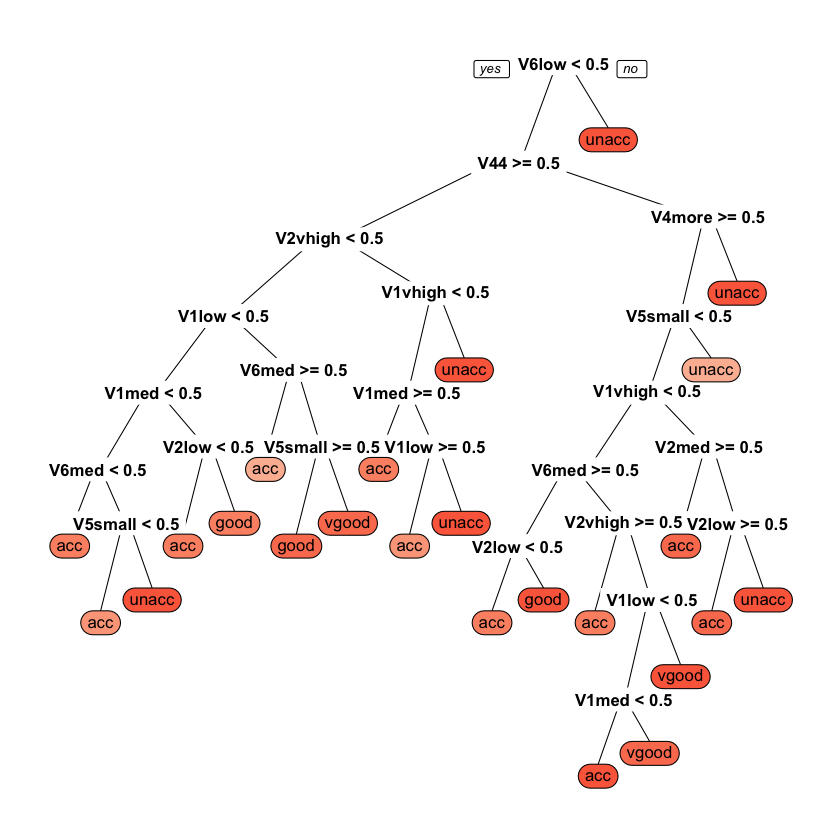

In [12]:
prp(dtree_fit$finalModel, box.palette = "Reds", tweak = 1.2)